### Import data and relevant libraries

In [2]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn

from scipy.stats.distributions import chi2

In [3]:
trucks = pd.read_csv('fleet_truck.csv')
trucks = trucks.dropna()
trucks.head()

,Maintenance_flag,Speed_sensor,Vibration,Engine_Load,Coolant_Temp,Intake_Pressure,Engine_RPM,Speed_OBD,Intake_Air,Flow_Rate,...,Oil_life,Vibration_alert,VibrationAlert_Total,Vibration_Recent,Turbo_alert,Emission_alert,Fog_control,Engine_control,fleetid,truckid
0,0,35,249.188875,21.568628,88,116,1115.5,35,10,18.33,...,0,1,123,12,1,1,1,1,Fleet_00713F1,Truck_0711X1
1,0,142,243.236572,20.392157,88,135,1782.5,142,16,35.41,...,0,1,123,12,1,1,1,1,Fleet_01213F1,Truck_0081X1
2,0,128,244.015378,43.529410,81,109,1588.0,128,9,27.08,...,0,1,123,12,1,1,1,1,Fleet_01213F1,Truck_0081X1
3,0,117,244.627297,99.607840,89,128,1899.5,117,13,36.99,...,0,1,123,12,1,1,1,1,Fleet_01013F1,Truck_0171X1
4,0,98,245.684248,73.333336,89,123,1230.5,98,9,21.63,...,0,1,123,12,1,1,1,1,Fleet_00413F1,Truck_0641X1


In [4]:
# the following columns have corrupt data
#'CO_emission', 'HC_emission', 'PM_emission', 'NOx_emission', 'CO2_emission', 'Fuel_level', 'Oil_life', 'Engine_control',
# 'Vibration_alert', 'VibrationAlert_Total', 'Vibration_Recent', 'Turbo_alert', 'Emission_alert', 'Fog_control'

trucks = trucks[['Speed_sensor', 'Vibration', 'Engine_Load', 'Coolant_Temp', 'Intake_Pressure', 'Engine_RPM', 'Speed_OBD', 
                 'Intake_Air', 'Flow_Rate', 'Throttle_Pos', 'Voltage', 'Ambient', 'Accel', 'Engine_Oil_Temp', 'Speed_GPS', 
                 'GPS_Longitude', 'GPS_Latitude', 'GPS_Bearing', 'GPS_Altitude', 'Turbo_Boost', 'Trip_Distance', 
                 'Litres_Per_km', 'Accel_Ssor_Total', 'CO2', 'Trip_Time', 'Maintenance_flag']]

### Exploratory data analysis

In [5]:
trucks.dtypes

Speed_sensor          int64
Vibration           float64
Engine_Load         float64
Coolant_Temp          int64
Intake_Pressure       int64
Engine_RPM          float64
Speed_OBD             int64
Intake_Air            int64
Flow_Rate           float64
Throttle_Pos        float64
Voltage             float64
Ambient               int64
Accel               float64
Engine_Oil_Temp       int64
Speed_GPS           float64
GPS_Longitude       float64
GPS_Latitude        float64
GPS_Bearing         float64
GPS_Altitude          int64
Turbo_Boost         float64
Trip_Distance       float64
Litres_Per_km       float64
Accel_Ssor_Total    float64
CO2                 float64
Trip_Time             int64
Maintenance_flag      int64
dtype: object

In [6]:
trucks.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7504 entries, 0 to 8306
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Speed_sensor      7504 non-null   int64  
 1   Vibration         7504 non-null   float64
 2   Engine_Load       7504 non-null   float64
 3   Coolant_Temp      7504 non-null   int64  
 4   Intake_Pressure   7504 non-null   int64  
 5   Engine_RPM        7504 non-null   float64
 6   Speed_OBD         7504 non-null   int64  
 7   Intake_Air        7504 non-null   int64  
 8   Flow_Rate         7504 non-null   float64
 9   Throttle_Pos      7504 non-null   float64
 10  Voltage           7504 non-null   float64
 11  Ambient           7504 non-null   int64  
 12  Accel             7504 non-null   float64
 13  Engine_Oil_Temp   7504 non-null   int64  
 14  Speed_GPS         7504 non-null   float64
 15  GPS_Longitude     7504 non-null   float64
 16  GPS_Latitude      7504 non-null   float64


In [7]:
round((trucks.describe().transpose()),2)

,count,mean,std,min,25%,50%,75%,max
Speed_sensor,7504.0,82.20,37.68,0.00,52.00,89.00,107.00,186.00
Vibration,7504.0,246.56,2.10,240.79,245.18,246.18,248.24,251.14
Engine_Load,7504.0,36.80,28.63,0.00,12.94,34.90,56.47,99.61
Coolant_Temp,7504.0,87.83,2.26,79.00,87.00,88.00,89.00,94.00
Intake_Pressure,7504.0,120.81,21.13,102.00,110.00,114.00,121.00,255.00
Engine_RPM,7504.0,1318.28,273.67,669.00,1174.50,1311.00,1446.50,2597.00
Speed_OBD,7504.0,82.20,37.68,0.00,52.00,89.00,107.00,186.00
Intake_Air,7504.0,10.40,2.31,6.00,9.00,10.00,11.00,18.00
Flow_Rate,7504.0,25.23,10.97,5.86,19.77,23.13,27.27,117.91
Throttle_Pos,7504.0,76.84,7.19,27.84,78.04,80.00,80.00,81.18


In [8]:
trucks.corr()

,Speed_sensor,Vibration,Engine_Load,Coolant_Temp,Intake_Pressure,Engine_RPM,Speed_OBD,Intake_Air,Flow_Rate,Throttle_Pos,...,GPS_Latitude,GPS_Bearing,GPS_Altitude,Turbo_Boost,Trip_Distance,Litres_Per_km,Accel_Ssor_Total,CO2,Trip_Time,Maintenance_flag
Speed_sensor,1.000000,-1.000000,0.192706,0.210972,0.405409,0.737568,1.000000,-0.356800,0.615391,0.538792,...,-0.012451,0.300454,0.283136,0.405439,-0.215639,-0.185222,-0.029403,-0.184606,-0.239405,-0.303204
Vibration,-1.000000,1.000000,-0.192706,-0.210972,-0.405409,-0.737568,-1.000000,0.356800,-0.615391,-0.538792,...,0.012451,-0.300454,-0.283136,-0.405439,0.215639,0.185222,0.029403,0.184606,0.239405,0.303204
Engine_Load,0.192706,-0.192706,1.000000,0.274931,0.469489,0.285690,0.192706,-0.051069,0.352071,0.064958,...,-0.062943,0.040568,-0.003954,0.469455,-0.009950,0.564037,0.013271,0.561250,-0.004578,-0.017409
Coolant_Temp,0.210972,-0.210972,0.274931,1.000000,0.225126,0.190791,0.210972,0.099399,0.207568,0.096374,...,-0.116321,0.039922,0.008582,0.225119,0.028744,0.129994,-0.042916,0.130813,0.054371,0.091939
Intake_Pressure,0.405409,-0.405409,0.469489,0.225126,1.000000,0.603218,0.405409,0.067920,0.852555,0.199360,...,-0.002841,0.050624,0.032905,0.999951,-0.025807,0.503762,-0.004885,0.505102,-0.031988,-0.113173
Engine_RPM,0.737568,-0.737568,0.285690,0.190791,0.603218,1.000000,0.737568,-0.059860,0.853249,0.405227,...,0.075462,0.161048,0.221018,0.603177,-0.146286,0.240291,-0.014045,0.240862,-0.154726,-0.268813
Speed_OBD,1.000000,-1.000000,0.192706,0.210972,0.405409,0.737568,1.000000,-0.356800,0.615391,0.538792,...,-0.012451,0.300454,0.283136,0.405439,-0.215639,-0.185222,-0.029403,-0.184606,-0.239405,-0.303204
Intake_Air,-0.356800,0.356800,-0.051069,0.099399,0.067920,-0.059860,-0.356800,1.000000,0.000077,-0.622644,...,0.025325,-0.031386,0.056668,0.067766,-0.119200,0.259726,-0.118074,0.261700,-0.087889,0.173180
Flow_Rate,0.615391,-0.615391,0.352071,0.207568,0.852555,0.853249,0.615391,0.000077,1.000000,0.338997,...,0.044898,0.109516,0.133750,0.852554,-0.093440,0.411860,-0.004473,0.413074,-0.103751,-0.214124
Throttle_Pos,0.538792,-0.538792,0.064958,0.096374,0.199360,0.405227,0.538792,-0.622644,0.338997,1.000000,...,-0.012534,0.248726,0.231682,0.199315,-0.162465,-0.149114,-0.026620,-0.148393,-0.163639,-0.201763


<AxesSubplot:>

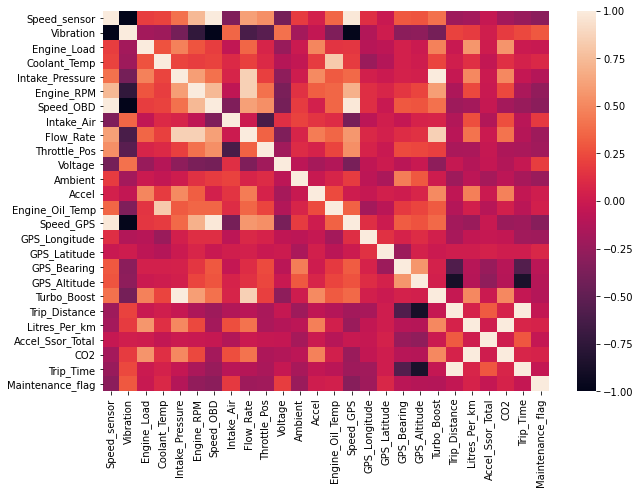

In [9]:
plt.subplots(figsize=(10,7))
sbn.heatmap(trucks.corr())

### Feature selection through forward selection

In [10]:
# The SWEEP Operator
def SWEEPOperator (pDim, inputM, tol):
    # pDim: dimension of matrix inputM, integer greater than one
    # inputM: a square and symmetric matrix, numpy array
    # tol: singularity tolerance, positive real

    aliasParam = []
    nonAliasParam = []
    
    A = np.copy(inputM)
    diagA = np.diagonal(inputM)

    for k in range(pDim):
        Akk = A[k,k]
        if (Akk >= (tol * diagA[k])):
            nonAliasParam.append(k)
            ANext = A - np.outer(A[:, k], A[k, :]) / Akk
            ANext[:, k] = A[:, k] / Akk
            ANext[k, :] = ANext[:, k]
            ANext[k, k] = -1.0 / Akk
        else:
            aliasParam.append(k)
            ANext[:,k] = np.zeros(pDim)
            ANext[k, :] = np.zeros(pDim)
        A = ANext

    return (A, aliasParam, nonAliasParam)

In [11]:
# X is a pandas dataframe, y is a pandas series
def GLM4BinaryLogistic (X, y, maxIter = 20, maxStep = 5, tolLLK = 1e-3, tolBeta = 1e-10):
    nObs = len(y)

   # Generate the design matrix with the Intercept term as the first column
    if X is not None:
        Xp1 = pd.DataFrame(np.full((nObs,1), 1.0), columns = ['_Intercept'], index = X.index)
        Xp1 = Xp1.join(X)
    else:
        Xp1 = pd.DataFrame(np.full((nObs,1), 1.0), columns = ['_Intercept'])
    
    pDim = Xp1.shape[1]
    designX = Xp1.to_numpy()
    designXT = np.transpose(designX)

    # Find the non-aliased columns
    inputM = np.dot(designXT, designX)
    outputM, aliasParam, nonAliasParam = SWEEPOperator (pDim, inputM, tol = 1e-10)

    # Make all objects as numpy
    designX = Xp1.values[:,nonAliasParam]
    designXT = np.transpose(designX)

    # Initialize predicted probabilities
    pEvent = np.mean(y)
    pNonEvent = 1.0 - pEvent
    odds = pEvent / pNonEvent
    y_predProb = np.full(nObs, pEvent)  
    beta = np.zeros((len(nonAliasParam)))
    beta[0] = np.log(odds)
    llk = np.sum(y * beta[0] + np.log(pNonEvent))

    # Prepare the iteration history table
    itList = [0, llk]
    for b in beta:
        itList.append(b)
    iterTable = [itList]

    for it in range(maxIter):
        gradient = np.dot(designXT, (y - y_predProb))
        dispersion = y_predProb * (1.0 - y_predProb)
        hessian = - np.dot(designXT, (dispersion.reshape((nObs,1)) * designX))
        delta = np.linalg.solve(hessian, gradient)
        step = 1.0
        for iStep in range(maxStep):
            beta_next = beta - step * delta
            nu_next = np.dot(designX, beta_next)
            odds = np.exp(nu_next)
            y_p0 = 1.0 / (1.0 + odds) 
            llk_next = np.sum(y * np.log(odds) + np.log(y_p0))
            if ((llk_next - llk) > - tolLLK):
                break
            else:
                step = 0.5 * step

        diffBeta = beta_next - beta
        llk = llk_next
        beta = beta_next
        y_predProb = 1.0 - y_p0
        itList = [it+1, llk]
        for b in beta:
            itList.append(b)
        iterTable.append(itList)
        if (np.linalg.norm(diffBeta) < tolBeta):
            break

    dispersion = y_predProb * (1.0 - y_predProb)
    hessian = - np.dot(designXT, (dispersion.reshape((nObs,1)) * designX))
    covBeta = np.linalg.inv(hessian)

    return(iterTable, nonAliasParam, llk, beta, covBeta, y_predProb)

In [12]:
# select target variable
y = trucks['Maintenance_flag']

# select list of columns to use
truck_columns = ['Speed_sensor', 'Vibration', 'Engine_Load', 'Coolant_Temp', 'Intake_Pressure', 'Engine_RPM', 'Speed_OBD', 
                 'Intake_Air', 'Flow_Rate', 'Throttle_Pos', 'Voltage', 'Ambient', 'Accel', 'Engine_Oil_Temp', 'Speed_GPS', 
                 'GPS_Longitude', 'GPS_Latitude', 'GPS_Bearing', 'GPS_Altitude', 'Turbo_Boost', 'Trip_Distance', 
                 'Litres_Per_km', 'Accel_Ssor_Total', 'CO2', 'Trip_Time']

# create initial model
int_iterTable, int_nonAliasParam, int_llk, int_beta, int_covBeta, int_y_predProb = GLM4BinaryLogistic(None, y)
int_free_par = len(int_nonAliasParam)

min_p = 1
min_feature = ''
for i in range(len(truck_columns)):
    
    X = trucks[truck_columns[i]]
    iterTable, nonAliasParam, llk, beta, covBeta, y_predProb = GLM4BinaryLogistic(X, y)
    
    free_par = len(nonAliasParam)
    deviance = 2*(llk-int_llk)
    deg_free = abs(len(nonAliasParam) - int_free_par)
    chi_sq = chi2.sf(deviance, deg_free)
    
    if chi_sq < min_p and chi_sq < 0.05:
        min_p = chi_sq
        min_feature = truck_columns[i]
        j = i
        
truck_columns.pop(j)
X0 = trucks[[min_feature]]

while True:    
    int_iterTable, int_nonAliasParam, int_llk, int_beta, int_covBeta, int_y_predProb = GLM4BinaryLogistic(X0, y)
    int_free_par = len(int_nonAliasParam)

    min_p = 1
    min_feature = ''
    for i in range(len(truck_columns)):
        X = X0.join(trucks[truck_columns[i]])
        iterTable, nonAliasParam, llk, beta, covBeta, y_predProb = GLM4BinaryLogistic(X, y)
    
        free_par = len(nonAliasParam)
        deviance = 2*(llk-int_llk)
        deg_free = abs(len(nonAliasParam) - int_free_par)
        chi_sq = chi2.sf(deviance, deg_free)
    
        if chi_sq < min_p and chi_sq < 0.05:
            min_p = chi_sq
            min_feature = truck_columns[i]
            j = i
        
    if min_p == 1 and min_feature == '': break

    truck_columns.pop(j)    
    X0 = X0.join(trucks[[min_feature]])

In [13]:
final_columns = X0.columns

final_columns

Index(['Speed_GPS', 'GPS_Longitude', 'Ambient', 'Trip_Distance',
       'GPS_Altitude', 'Engine_Oil_Temp', 'GPS_Latitude', 'Flow_Rate',
       'Intake_Pressure', 'Trip_Time', 'Voltage', 'GPS_Bearing',
       'Engine_Load'],
      dtype='object')

### Run final model

In [14]:
X = trucks[final_columns]
y = trucks['Maintenance_flag']

In [15]:
# Final main effect model
iterTable, nonAliasParam, llk, beta, covBeta, y_predProb = GLM4BinaryLogistic(X, y)

paramName = X.columns.insert(0,'Intercept')
beta = pd.Series(beta, index = paramName[nonAliasParam])
beta_all = pd.Series(beta, index = paramName)

In [16]:
#print("""The final formual is: 
#y = {} + {}*Speed_GPS + {}*GPS_Longitude + {}*Ambient + {}*Trip_Distance + {}*GPS_Altitude + 
#{}*Engine_Oil_Temp + {}*GPS_Latitude + {}*Flow_Rate + {}*Intake_Pressure + {}*Trip_Time + {}*Voltage + 
#{}*GPS_Bearing + {}*Engine_Load"""
#      .format(round(beta_all['Intercept'],3), round(beta_all['Speed_GPS'],3), round(beta_all['GPS_Longitude'],3), 
#              round(beta_all['Ambient'],3), round(beta_all['Trip_Distance'],3), round(beta_all['GPS_Altitude'],3), 
#             round(beta_all['Engine_Oil_Temp'],3), round(beta_all['GPS_Latitude'],3), round(beta_all['Flow_Rate'],3),
#             round(beta_all['Intake_Pressure'],3), round(beta_all['Trip_Time'],3), round(beta_all['Voltage'],3),
#             round(beta_all['GPS_Bearing'],3), round(beta_all['Engine_Load'],3)))

In [17]:
Y = list(trucks['Maintenance_flag'])
predProbY = y_predProb

# calculate precision, recall, and F1 for different thresholds
threshold_list = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]
max_F1_score = 0
best_threshold = ''

F1 = []
threshold = []

for thresh in threshold_list:   
    true_pos = 0
    false_pos = 0
    false_neg = 0
    true_neg = 0
    F1_score = 0

    for i in range(len(Y)):
        if predProbY[i] >= thresh and Y[i] == 1:
            true_pos += 1
        elif predProbY[i] >= thresh and Y[i] == 0:
            false_pos += 1
        elif predProbY[i] < thresh and Y[i] == 1:
            false_neg += 1
        elif predProbY[i] < thresh and Y[i] == 0:
            true_neg += 1
        else:
            print("ERROR")
    
    if (false_pos + true_pos) > 0 and (false_neg + true_pos) > 0:
        precision = true_pos/(false_pos + true_pos)
        recall = true_pos / (false_neg + true_pos)          
        F1_score = 2.0*(precision * recall)/(precision + recall)
        
        threshold.append(thresh)
        F1.append(F1_score)

    if F1_score > max_F1_score:
        max_F1_score = F1_score
        best_threshold = thresh

In [18]:
print(max_F1_score, best_threshold)

0.648997134670487 0.2


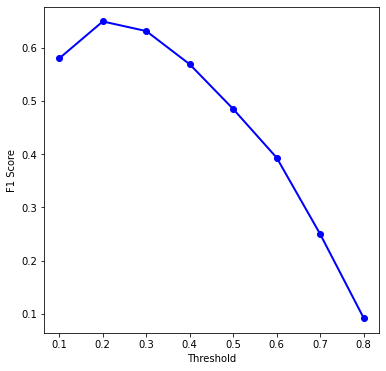

In [19]:
# Draw the F1 Score curve
plt.figure(figsize=(6,6))
plt.plot(threshold, F1, marker = 'o',color = 'blue', linestyle = 'solid', linewidth = 2, markersize = 6)
plt.xlabel("Threshold")
plt.ylabel("F1 Score")
plt.show()

In [25]:
predictions = trucks[['Maintenance_flag']]
predictions['Predicted maintenance flag'] = np.where(y_predProb >= 0.2, 1, 0)
predictions['Accuracy'] = np.where(predictions['Predicted maintenance flag'] == predictions['Maintenance_flag'], 1, 0)

KeyError: 'Predicted maintenance flag'

In [23]:
predictions['Accuracy'].sum()/len(predictions)

0.8041044776119403